# Optimal Number of Bins for Statistical Studies
Some statistical analyses where highly skewed data are present, particularly in the form of exponential or lognormal distribution, a weighted mean needs to be determined. In these cases a frequency distribution from a histogram can be used to detemine a weighed mean. The weighed mean can be significantly different from a median or geometric mean. The number of bins used in the histogram can also have a significant impact on the weighted mean determination. There are at least eight reported methods for determining the optimal number of bins that can be implimented in Python's matplotlib library for plotting histograms:
- auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance.
- fd: (Freedman Diaconis Estimator) Robust (resilient to outliers) estimator that takes into account data variability and data size.
- doane: An improved version of Sturges’ estimator that works better with non-normal datasets.
- scott: Less robust estimator that takes into account data variability and data size.
- stone: Estimator based on leave-one-out cross-validation estimate of the integrated squared error. Can be - regarded as a generalization of Scott’s rule.
- rice: Estimator does not take variability into account, only data size. Commonly overestimates number of bins required.
- sturges: R’s default method, only accounts for data size. Only optimal for gaussian data and underestimates number of bins for large non-gaussian datasets.
- sqrt: Square root (of data size) estimator, used by Excel and other programs for its speed and simplicity.
<br><br>
**This Jupyter workbook demonstrates their implimentation, reporting the number of bins and the calculation for the weighted means in the following sections:**
1) Sturges 1+log2(n)  
2) Scott  
3) Freeman-Diaconis  
4) Matplotlib plotting routine (hist) has 8 options, all but Baysain  
5) Astropy Library - Baysian.
<br><br>
Why do I care about the weight mean? For calculating the exponential distributions in Excel, I need to know the number of bins and the weighted mean. The rate constant used in Excel's built-in EXPON.DIST funtion is 1/wt. mean.<br>   
<u>**References:**<u>  
- https://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram#:~:text=Bins%20are%20the%20number%20of,of%20values%20in%20your%20distribution  
- https://medium.datadriveninvestor.com/how-to-decide-on-the-number-of-bins-of-a-histogram-3c36dc5b1cd8


In [1]:
# Import libraries and set global parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# SET GLOBAL STYLE PARAMETERS
plt.style.use('ggplot') # This is a global setting
plt.rcParams["figure.figsize"]=8,4  #10 x 8 is default figure size in Jupyter Notebook
plt.rcParams.update({'font.size': 12})

In [2]:
# Create a function to do descriptive statistics
def my_stats(var):
    import numpy as np
    from scipy.stats import skew
    from scipy.stats import kurtosis
    from scipy import stats
    
    # Find the mode (ml) using a detailed histogram
    n, bins, patches=plt.hist(var, bins=500, edgecolor='gray', density=True, alpha=.2)
    plt.close()
    mode_index = n.argmax()
    mode=(bins[mode_index] + bins[mode_index+1])/2
    #############################################
    print('Descriptive Statistics:')
    print('mean:   ','{: ,.4f}'.format(np.mean(var)))
    print('median: ','{: ,.4f}'.format(np.median(var)))
    print('mode:   ','{: ,.4f}'.format(mode))
    print('sem:    ','{: ,.4f}'.format(stats.sem(var)))
    print('min:    ','{: ,.4f}'.format(np.min(var)))
    print('max:    ','{: ,.4f}'.format(np.max(var)))
    print('stdev:  ','{: ,.4f}'.format(np.std(var)))
    print('skew:   ','{: ,.4f}'.format(skew(var)))
    print('kurt:   ','{: ,.4f}'.format(kurtosis(var)))
    print('p05:    ','{: ,.4f}'.format(np.percentile(var,5)))
    print('p95:    ','{: ,.4f}'.format(np.percentile(var,95)))
    print('count:  ','{: ,.4f}'.format(np.count_nonzero(var)))

In [3]:
# United States top oil field sizes in thousands of oil-equivalent barrels
oeb=[238050,99787,79080,47259,62046,29487,15833,19996,23703,27346,19587,11665,25793,18291,28766,25494,1187,8492,
   17587,19396,15880,12922,35280,8930,13801,24808,23832,5452,3782,7825,307,4912,11793,5335,13496,6424,4051,5498,
   4011,7106,23360,8186,14306,7277,3694,10242,2476,5755,6116,3519,4407,7229,8808,8294,3737,5115,3441,4930,2348,
   4820,8226,3925,4308,3223,2563,6730,7484,21206,3093,3586,5660,5044,10421,2032,3516,3187,2415,3464,5111,4024,4131,
   2733,3840,4010,8247,3378,1790,1937,2270,3319,2251,6151,3325,2326,2096]
koeb=np.array(oeb)
koeb = koeb[koeb < np.max(koeb)] #Remove Extreme Outlier

## Sturges

8 9
12874


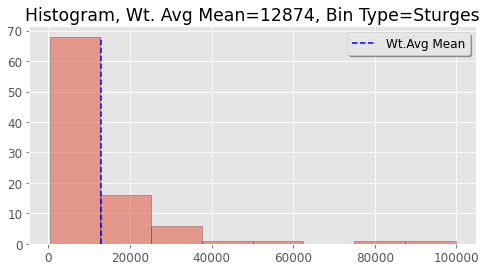

In [4]:
# Sturges

sturges=np.round(1+np.log2(np.size(koeb)),0).astype(int)

n, bins, edges = plt.hist(koeb, bins=sturges, edgecolor='k', alpha=0.5)
print(np.size(n), np.size(bins))
#Calculate weighted Mean
bin_middles = (bins[:-1] + bins[1:]) / 2
counts=np.size(n)
wt=n*bin_middles
sum_wt=np.sum(wt)
wt_avg=(sum_wt/np.sum(n)).astype(int)
print(wt_avg)

plt.vlines(wt_avg, 0, np.max(n), colors='b', linestyles='--', label='Wt.Avg Mean')
plt.title('Histogram, Wt. Avg Mean=' +str(wt_avg) + ', Bin Type=Sturges')
plt.legend(shadow=True)
plt.show()

## Scott
Scott 1979, a good rule of thumb is to use:  
R(n^(1/3))/(3.49σ)  
where  
R is the range of data (in your case R = 3-(-3)= 6)  
n is the number of samples  
σ is your standard deviation.

bins_scott=   8
12874


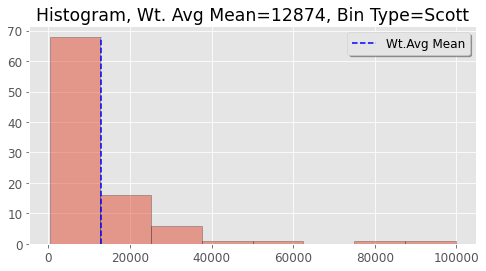

In [5]:
# Calculate Scott's bins by hand
R=np.max(koeb)-np.min(koeb)
C= np.size(koeb)
STD=np.std(koeb)
top= C**(1/3)
bot=3.49*STD
bins_scott= np.round(R*top/bot,0).astype(int)

n,bins,edges=plt.hist(koeb, bins=bins_scott, edgecolor='k', alpha=0.5)

print('bins_scott=  ', bins_scott)

#Calculate weighted Mean
bin_middles = (bins[:-1] + bins[1:]) / 2
counts=np.size(n)
wt=n*bin_middles
sum_wt=np.sum(wt)
wt_avg=(sum_wt/np.sum(n)).astype(int)
print(wt_avg)

plt.vlines(wt_avg, 0, np.max(n), colors='b', linestyles='--', label='Wt.Avg Mean')
plt.title('Histogram, Wt. Avg Mean=' +str(wt_avg) + ', Bin Type=Scott')
plt.legend(shadow=True)
plt.show()


### Scott implimented in matplotlib
**Note that the number of bins is not the same as the hand caclulation above**

bins Scott= 9
12771


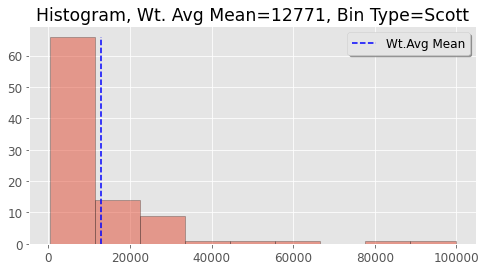

In [10]:
n, bins, edges = plt.hist(koeb, bins='scott', edgecolor='k', alpha=0.5)
print('bins Scott=', np.size(n))

#Calculate weighted Mean
bin_middles = (bins[:-1] + bins[1:]) / 2
counts=np.size(n)
wt=n*bin_middles
sum_wt=np.sum(wt)
wt_avg=(sum_wt/np.sum(n)).astype(int)
print(wt_avg)

plt.vlines(wt_avg, 0, np.max(n), colors='b', linestyles='--', label='Wt.Avg Mean')
plt.title('Histogram, Wt. Avg Mean=' +str(wt_avg) + ', Bin Type=Scott')
plt.legend(shadow=True)
plt.show()


## Freedman-Diaconis

bins Astropy= 23
bins Freeman= 22
11654


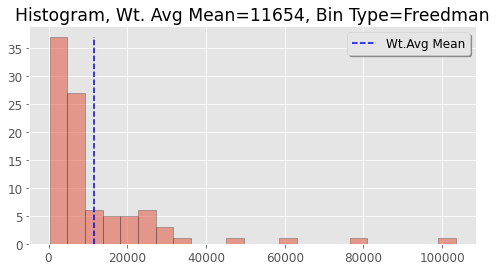

In [7]:
from astropy.visualization import hist

IQR = np.percentile(koeb,75)-np.percentile(koeb,25)
bin_width=2*IQR/np.size(koeb)**(1/3)
bins_freeman=round((np.max(koeb)-np.min(koeb))/bin_width,0).astype(int)

n, bins, edges =hist(koeb, bins="freedman", edgecolor='k', alpha=0.5)
print('bins Astropy=', np.size(n))
print('bins Freeman=', bins_freeman)

#Calculate weighted Mean
bin_middles = (bins[:-1] + bins[1:]) / 2
counts=np.size(n)
wt=n*bin_middles
sum_wt=np.sum(wt)
wt_avg=(sum_wt/np.sum(n)).astype(int)
print(wt_avg)

plt.vlines(wt_avg, 0, np.max(n), colors='b', linestyles='--', label='Wt.Avg Mean')
plt.title('Histogram, Wt. Avg Mean=' +str(wt_avg) + ', Bin Type=Freedman')
plt.legend(shadow=True)
plt.show()


## Matplotlib Selections

- <u>**auto:**<u> Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance.
- **fd:** (Freedman Diaconis Estimator) Robust (resilient to outliers) estimator that takes into account data variability and data size.
- **doane:** An improved version of Sturges’ estimator that works better with non-normal datasets.
- **scott:** Less robust estimator that takes into account data variability and data size.
- **stone:** Estimator based on leave-one-out cross-validation estimate of the integrated squared error. Can be regarded as a generalization of Scott’s rule.
- **rice:** Estimator does not take variability into account, only data size. Commonly overestimates number of bins required.
- **sturges:** R’s default method, only accounts for data size. Only optimal for gaussian data and underestimates number of bins for large non-gaussian datasets.
- **sqrt:** Square root (of data size) estimator, used by Excel and other programs for its speed and simplicity.

9 10
12771


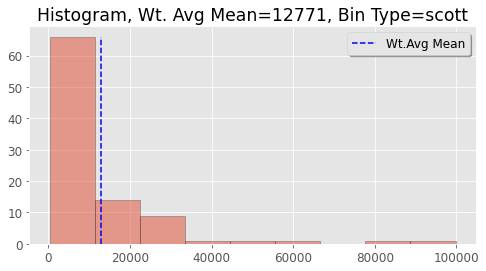

In [8]:
# Matplotlib Options

bin_type="scott"  #<<<<< Select the bin type from the list above

n,bins,edges=plt.hist(koeb, bins=bin_type,edgecolor='k', alpha=.5)
print(np.size(n), np.size(bins))

#Calculate weighted Mean
bin_middles = (bins[:-1] + bins[1:]) / 2
counts=np.size(n)
wt=n*bin_middles
sum_wt=np.sum(wt)
wt_avg=(sum_wt/np.sum(n)).astype(int)
print(wt_avg)

plt.vlines(wt_avg, 0, np.max(n), colors='b', linestyles='--', label='Wt.Avg Mean')
plt.title('Histogram, Wt. Avg Mean=' +str(wt_avg) + ', Bin Type=' + bin_type)
plt.legend(shadow=True)
plt.show()

## Baysian in Astropy library
Bin Size is variable

Wt. Avg= 12182
5 6


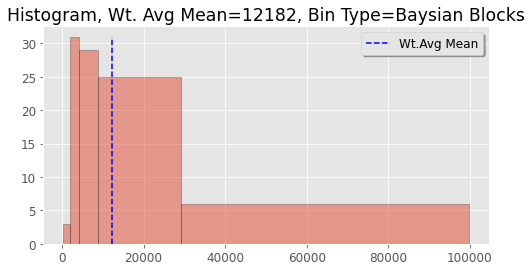

In [9]:

# Baysian bins of unequal size - requires brining in the following library

from astropy.visualization import hist

n, bins, edges =hist(koeb, bins="blocks", edgecolor='k', alpha=0.5)

#Calculate weighted Mean
bin_middles = (bins[:-1] + bins[1:]) / 2
counts=np.size(n)
wt=n*bin_middles
sum_wt=np.sum(wt)
wt_avg=(sum_wt/np.sum(n)).astype(int)
print('Wt. Avg=', wt_avg)

print(np.size(n), np.size(bins))
plt.vlines(wt_avg, 0, np.max(n), colors='b', linestyles='--', label='Wt.Avg Mean')
plt.title('Histogram, Wt. Avg Mean=' +str(wt_avg) + ', Bin Type=Baysian Blocks')
plt.legend(shadow=True)
plt.show()